# Generate a Cubic Lattice with an Interpenetrating Dual Cubic Lattice

OpenPNM offers several options for generating *dual* networks.  This tutorial will outline the use of the basic *CubicDual* class, while the *DelaunayVoronoiDual* is covered elsewhere.  The main motivation for creating these dual networks is to enable the modeling of transport in the void phase on one network and through the solid phase on the other. These networks are interpenetrating but not overlapping or coincident so it makes the topology realistic or at least consistent.  Moreover, these networks are interconnected to each other so they can exchange quantities between them, such as gas-solid heat transfer. The tutorial below outlines how to setup a *CubicDual* network object, describes the combined topology, and explains how to use labels to access different parts of the network.

As usual start by importing Scipy and OpenPNM:

In [1]:
import scipy as sp
import numpy as np
import openpnm as op
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)
wrk = op.Workspace()  # Initialize a workspace object
wrk.settings['loglevel'] = 50

Let's create a *CubicDual* and visualize it in Paraview:

In [2]:
net = op.network.CubicDual(shape=[6, 6, 6])

The resulting network has two sets of pores, labelled as blue and red in the image below.  By default, the main cubic lattice is referred to as the 'primary' network which is colored *blue* and is defined by the ``shape`` argument, and the interpenetrating dual is referred to as the 'secondary' network shown in *red*.  These names are used to label the pores and throats associated with each network.  These names can be changed by sending ``label_1`` and ``label_2`` arguments during initialization.  The throats connecting the 'primary' and 'secondary' pores are labelled 'interconnect', and they can be seen as the diagonal connections below.

<img src="https://i.imgur.com/3KRduQh.png" style="width: 60%" align="left"/>

The ``topotools`` module of openpnm also has handy visualization functions which can be used to consecutively build a picture of the network connections and coordinates. 

> Replace ```%matplotlib inline``` with ```%matplotlib notebook``` for 3D interactive plots.

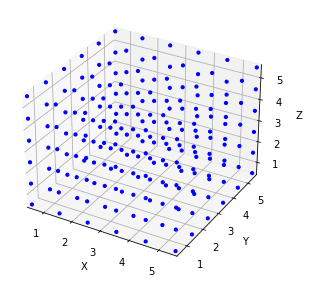

In [3]:
#NBVAL_IGNORE_OUTPUT
from openpnm.topotools import plot_connections, plot_coordinates
plot_coordinates(network=net, pores=net.pores('primary'), c='b')

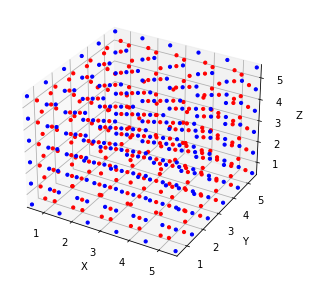

In [4]:
#NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots()
plot_coordinates(network=net, pores=net.pores('primary'), c='b', ax=ax)
plot_coordinates(network=net, pores=net.pores('secondary'), ax=ax, c='r')

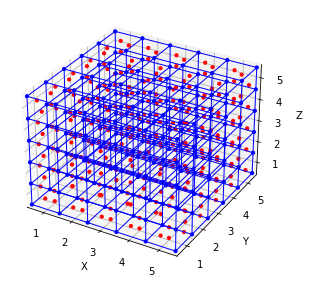

In [5]:
#NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots()
plot_coordinates(network=net, pores=net.pores('primary'), c='b', ax=ax)
plot_coordinates(network=net, pores=net.pores('secondary'), ax=ax, c='r')
plot_connections(network=net, throats=net.throats('primary'), ax=ax, c='b')

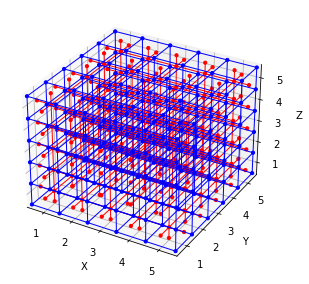

In [6]:
#NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots()
plot_coordinates(network=net, pores=net.pores('primary'), c='b', ax=ax)
plot_coordinates(network=net, pores=net.pores('secondary'), ax=ax, c='r')
plot_connections(network=net, throats=net.throats('primary'), ax=ax, c='b')
plot_connections(network=net, throats=net.throats('secondary'), ax=ax, c='r')

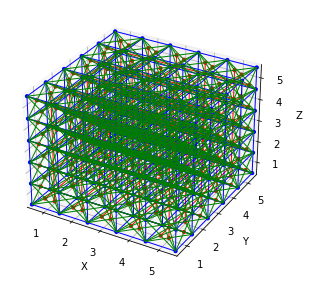

In [7]:
#NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots()
plot_coordinates(network=net, pores=net.pores('primary'), c='b', ax=ax)
plot_coordinates(network=net, pores=net.pores('secondary'), ax=ax, c='r')
plot_connections(network=net, throats=net.throats('primary'), ax=ax, c='b')
plot_connections(network=net, throats=net.throats('secondary'), ax=ax, c='r')
plot_connections(network=net, throats=net.throats('interconnect'), ax=ax, c='g')

Inspection of this image shows that the 'primary' pores are located at expected locations for a cubic network including on the faces of the cube, and 'secondary' pores are located at the interstitial locations.  There is one important nuance to note: Some of 'secondary' pores area also on the face, and are offset 1/2 a lattice spacing from the internal 'secondary' pores.  This means that each face of the network is a staggered tiling of 'primary' and 'secondary' pores.  

The 'primary' and 'secondary' pores are connected to themselves in a standard 6-connected lattice, and connected to each other in the diagonal directions.  Unlike a regular *Cubic* network, it is not possible to specify more elaborate connectivity in the *CubicDual* networks since the throats of each network would be conceptually entangled.  The figure below shows the connections in the secondary (left), and primary (middle) networks, as well as the interconnections between them (right).

![](https://i.imgur.com/mVUhSP5.png)

Using the labels it is possible to query the number of each type of pore and throat on the network:

In [8]:
print(f"No. of primary pores: {net.num_pores('primary')}")
print(f"No. of secondary pores: {net.num_pores('secondary')}")
print(f"No. of primary throats: {net.num_throats('primary')}")
print(f"No. of secondary throats: {net.num_throats('secondary')}")
print(f"No. of interconnect throats: {net.num_throats('interconnect')}")

No. of primary pores: 216
No. of secondary pores: 275
No. of primary throats: 540
No. of secondary throats: 450
No. of interconnect throats: 1600


Now that this topology is created, the next step would be to create *Geometry* objects for each network, and an additional one for the 'interconnect' throats. We can use the predefined labels on the network to specify which pores and throats belong to each geometry:

In [9]:
geo_pri = op.geometry.GenericGeometry(network=net,
                                      pores=net.pores('primary'),
                                      throats=net.throats('primary'))
geo_sec = op.geometry.GenericGeometry(network=net,
                                      pores=net.pores('secondary'),
                                      throats=net.throats('secondary'))
geo_inter = op.geometry.GenericGeometry(network=net,
                                        throats=net.throats('interconnect'))